In [1]:
import os
import mne
%matplotlib inline
import numpy as np

In [5]:
# subject ID
sub_num = "C15"

data_dir = "../../../Matlab Code/Processed Data/"
# data_dir = "../../../Matlab Code/Processed Data - Needing Marker Repair/"

sub_id=''
for file in os.listdir(data_dir):
    if file.startswith(sub_num) and file.endswith('raw.fif'):
        sub_id = file

print(f"{sub_id}\nreading preprocessed-raw file...")
raw_file = mne.io.read_raw_fif(data_dir+sub_id, preload=True)

raw_file

C15_preprocessed-raw.fif
reading preprocessed-raw file...
Opening raw data file ../../../Matlab Code/Processed Data/C15_preprocessed-raw.fif...
    Range : 0 ... 717599 =      0.000 ...  1793.997 secs
Ready.
Reading 0 ... 717599  =      0.000 ...  1793.997 secs...


<Raw | C15_preprocessed-raw.fif, 64 x 717600 (1794.0 s), ~350.5 MB, data loaded>

In [6]:
events, event_ids = mne.events_from_annotations(raw_file)
event_ids

inv_map = {v: k for k, v in event_ids.items()}
inv_map

Used Annotations descriptions: ['1000001', '1000010', '1100001', '1100010', 'Med Pain Back', 'Med Pain Hand', 'No Pain Back', 'No Pain Hand', 'Stop', 'Yes Pain Back', 'Yes Pain Hand', 'eyes closed', 'eyes opened']


{1: '1000001',
 2: '1000010',
 3: '1100001',
 4: '1100010',
 5: 'Med Pain Back',
 6: 'Med Pain Hand',
 7: 'No Pain Back',
 8: 'No Pain Hand',
 9: 'Stop',
 10: 'Yes Pain Back',
 11: 'Yes Pain Hand',
 12: 'eyes closed',
 13: 'eyes opened'}

In [8]:
# annots = np.where((events[:, 2] == 4) | (events[:, 2] == 5) | (events[:, 2] == 6) | (events[:, 2] == 7) | (events[:, 2] == 9) | (events[:, 2] == 10))[0]
# annots = np.where(events[:, 2] == 6)[0]

# d = {
#     5:7,
#     6:4,
#     7:8,
#     8:5,
#     9:6,
#     10:3,
# }

d = {
    5:7,
    6:4,
    7:8,
    8:5,
    10:6,
    11:3,
}

# d = {
#     3:5,
#     4:6,
#     5:3,
#     6:4,
# }

# print(f"{len(annots)} instances")
a = 0
for i in range(events.shape[0]):
    if events[i][0] in [1133601] or events[i][2] not in d: continue
    a += 1
    print(events[i][0], d[events[i][2]], inv_map[events[i][2]], '\n' if a % 10 == 0 else ' ')
#     print(events[i+1], "\n")
#     print(events[i+2], "\n")
print(a)

432038 4 Med Pain Hand  
436821 5 No Pain Hand  
440918 4 Med Pain Hand  
444680 5 No Pain Hand  
448381 5 No Pain Hand  
452518 4 Med Pain Hand  
456981 5 No Pain Hand  
461225 5 No Pain Hand  
464992 4 Med Pain Hand  
468998 4 Med Pain Hand 

473497 8 No Pain Back  
481173 8 No Pain Back  
485038 7 Med Pain Back  
488918 7 Med Pain Back  
494381 8 No Pain Back  
498781 7 Med Pain Back  
503121 7 Med Pain Back  
507181 8 No Pain Back  
510761 7 Med Pain Back  
514857 8 No Pain Back 

522301 5 No Pain Hand  
524777 3 Yes Pain Hand  
527501 5 No Pain Hand  
530024 3 Yes Pain Hand  
533101 5 No Pain Hand  
538661 5 No Pain Hand  
542501 3 Yes Pain Hand  
546181 5 No Pain Hand  
549141 3 Yes Pain Hand  
552638 3 Yes Pain Hand 

557021 6 Yes Pain Back  
561539 6 Yes Pain Back  
565861 8 No Pain Back  
569598 8 No Pain Back  
573878 6 Yes Pain Back  
577398 8 No Pain Back  
590054 6 Yes Pain Back  
596256 8 No Pain Back  
600178 6 Yes Pain Back  
604701 8 No Pain Back 

610821 3 Yes Pain Ha

In [9]:
# annots = np.where((events[:, 2] == 4) | (events[:, 2] == 5) | (events[:, 2] == 6) | (events[:, 2] == 7) | (events[:, 2] == 9) | (events[:, 2] == 10))[0]
# annots = np.where(events[:, 2] == 6)[0]

# print(f"{len(annots)} instances")
a = 0
for i in range(events.shape[0]):
    if events[i][0] in [] or events[i][2] not in d: continue
    a += 1
    print(d[events[i][2]])
#     print(events[i+1], "\n")
#     print(events[i+2], "\n")

4
5
4
5
5
4
5
5
4
4
8
8
7
7
8
7
7
8
7
8
5
3
5
3
5
5
3
5
3
3
6
6
8
8
6
8
6
8
6
8
3
3
3
4
3
4
4
3
4
3
7
6
6
7
6
6
7
6
7
7


In [52]:
print(f"{sub_id}\n")
subject_num=sub_num

events, event_ids = mne.events_from_annotations(raw_file)
    
int_to_id = {}

for event_name, event_id in event_ids.items():
    if event_name in ['Back YES Pain prick', 'Yes Back Pain', "BACK PINPRICK", 'back 32 gauge pinprick', 'back pinprick', 'pinprick back', 'BACK  PINPRICK'] :
        event_name = "Yes Pain Back"
    elif event_name in ['Back No Pain', 'No Back Pain', 'BACK PLASTIC', 'back plastic filament', 'back plastic', 'plastic back', 'BACK PLASTIC']:
        event_name = "No Pain Back"
    elif event_name in ['Hand YES Pain prick', 'Yes Hand Pain', 'HAND PINPRICK', 'hand 32 gauge pinprick', 'hand pinprick', 'pinprick hand']:
        event_name = "Yes Pain Hand"
    elif event_name in ['Hand NO Pain', 'No Hand Pain', 'HAND PLASTIC', 'hand plastic filament', 'hand plastic', 'plastic hand']:
        event_name = "No Pain Hand"
    elif event_name in ['Back Medium Pain prick', 'Med Back Pain']:
        event_name = "Med Pain Back"
    elif event_name in ['Hand Medium Pain prick', 'Med Hand Pain']:
        event_name = "Med Pain Hand"
    int_to_id[event_id] = event_name

stimulation_times = {
    "No Pain Hand"  : [],
    "Med Pain Hand" : [],
    "Yes Pain Hand" : [],
    "No Pain Back"  : [],
    "Med Pain Back" : [],
    "Yes Pain Back" : [],
}

for i in range(events.shape[0]):
    event_name = int_to_id[events[i][2]]
    if event_name in stimulation_times:
        if subject_num in ["C1", "C2", "C3"]:
            stimulation_times[event_name].append(np.floor(events[i][0]*(1000/400)))
            continue
        if int_to_id[events[i+1][2]] not in stimulation_times:
            stimulation_times[event_name].append(np.floor(events[i+1][0]*(1000/400)))

for key, val in stimulation_times.items():
    print(key, val)

C5._preprocessed-raw.fif

Used Annotations descriptions: ['100048', '100480', 'back pinprick', 'back plastic', 'hand pinprick', 'hand plastic', 'stop', 'test']
No Pain Hand [98762.0, 160750.0, 186695.0, 256655.0, 609530.0, 621895.0, 633750.0, 698065.0, 1018762.0, 1032175.0, 1045945.0, 1058570.0, 1090495.0, 1273660.0, 1319407.0, 1330715.0, 1354452.0, 1367460.0]
Med Pain Hand []
Yes Pain Hand [63787.0, 85022.0, 119710.0, 140530.0, 204392.0, 239687.0, 655020.0, 666047.0, 718850.0, 731905.0, 748065.0, 969292.0, 985017.0, 998857.0, 1074405.0, 1104807.0, 1282937.0, 1295680.0, 1306860.0, 1342497.0, 1381092.0]
No Pain Back [322565.0, 357885.0, 440477.0, 575410.0, 854750.0, 884355.0, 956050.0, 1138402.0, 1183652.0, 1211720.0, 1253822.0, 1409630.0, 1475927.0, 1485480.0, 1499615.0, 1528357.0]
Med Pain Back []
Yes Pain Back [305762.0, 419337.0, 486847.0, 511247.0, 536022.0, 771807.0, 798600.0, 820827.0, 903065.0, 938427.0, 1120175.0, 1152390.0, 1166905.0, 1224027.0, 1238340.0, 1395202.0, 1420225.0

In [53]:
events

array([[     2,      0,      1],
       [     3,      0,      1],
       [     3,      0,      1],
       ...,
       [611343,      0,      2],
       [611723,      0,      1],
       [615640,      0,      7]])

Using matplotlib as 2D backend.


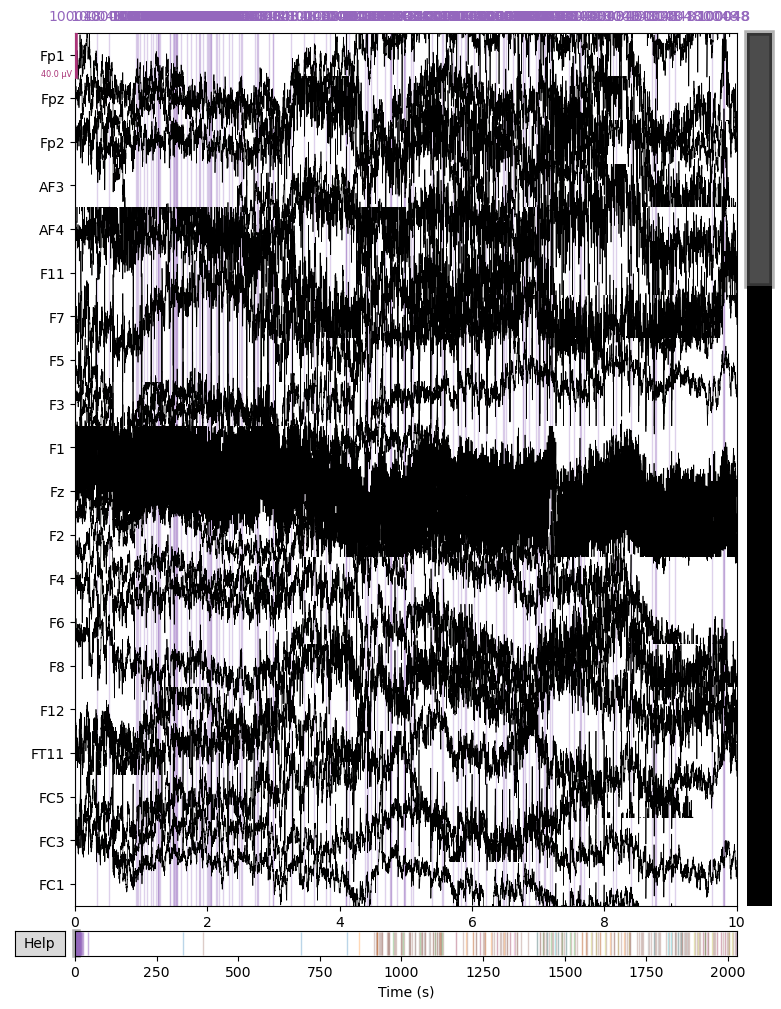

Channels marked as bad: none


In [17]:
# test = "Yes Pain Hand"
# trial = 4
# start = stimulation_times[test][trial-1] / 1000 - 2
# duration= 4

raw_file.plot(start=0, duration=10, event_color="black")
# preprocessed_file.plot(start=start, duration=duration, event_color="black")